# Network Models: Small World¶


#### Task 1
The idea of the  Watts and Strogatz model:
1. Start with regular lattice with N nodes, K nearest neighbours
2. For each node take every edge and rewire it with probability $p$, assuming that there is no loops and edge duplications

Implement rewind(G, p) function that takes graph G and probability p as input. The function should produce a graph after step 2 of the model above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline
import random

In [2]:
def gen_regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    return G

def degree_distr(k, bins = 100):
    yh, binEdges = np.histogram(k, bins)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return yh, bincenters

# task 1:
def rewind(G, p):
    edges = G.edges()
    for e in edges:
        if G.degree(e[0]) == len(G.nodes())-1: #  if the start node of the current edge is connected with all 
            continue                           #  other nodes, then there is no ways to rewrite edge
        if random.random() < p:
            n_new = random.randint(0,len(G.nodes())) #  a new randow node 
            while n_new == e[0] or G.has_edge(e[0],n_new): # no loops and edge duplications
                n_new = random.randint(0,len(G.nodes()))
            G.remove_edge(*e) # remove the current edge
            G.add_edge(e[0],n_new) # add the new edge
    return G

#### Task 2
Run experiments for various values of p, compute and show:

* average path length 
* clustering coefficients (transitivity)
* degree distribution

In [160]:
def gen(i):
    x = i*0.1
    return x

def task2(k,n,c):
    G = gen_regular_graph(n,k) # generate regular graph such that k << n
    prob_small = [gen(i)*0.1 for i in range(0,10)]
    apl_small = []
    tr_small = []
    apl = []
    tr = []
    ind = 0
    plt.figure(figsize=(10,6))
    for p in prob_small:
        ind += 1
        G_new = rewind(G, p) # random rewritng of edges
        CC = nx.connected_components(G_new)
        CC_sort = sorted(CC, key = len, reverse = True)
        SG = G_new.subgraph(CC_sort[0]) # the greatest connected component
        apl_small.append(nx.average_shortest_path_length(SG)) # average path length
        tr_small.append(nx.transitivity(SG)) # clustering coefficients (transitivity)
        d = nx.degree(G_new).values()
        plt.subplot(2,5,ind)
        yh, bincenters = degree_distr(d)
        plt.plot(bincenters, yh, c)
        plt.title('p = %s, k = %s'%(p,k))
    
    ind = 0
    plt.figure()
    plt.figure(figsize=(10,6))
    prob = [gen(i) for i in range(1,11)]
    for p in prob:
            ind += 1
            G_new = rewind(G, p) # random rewritng of edges
            CC = nx.connected_components(G_new)
            CC_sort = sorted(CC, key = len, reverse = True)
            SG = G_new.subgraph(CC_sort[0]) # the greatest connected component
            apl.append(nx.average_shortest_path_length(SG)) # average path length
            tr.append(nx.transitivity(SG)) # clustering coefficients (transitivity)
            d = nx.degree(G_new).values()
            plt.subplot(2,5,ind)
            yh, bincenters = degree_distr(d)
            plt.plot(bincenters, yh, c)
            plt.title('p = %s, k = %s'%(p,k))
            
    plt.figure()
    plt.figure( figsize=(10,4))
    plt.subplot(121)
    plt.plot(prob_small,apl_small)
    print "<L(0)> =", apl_small[0]
    plt.title('average path length for k =%s'%k)
    plt.xlabel('p')
    plt.ylabel('average path length')
    plt.subplot(122)
    plt.plot(prob_small,tr_small)
    print "C(0) =", tr_small[0]
    plt.xlabel('p')
    plt.ylabel('clustering coefficients')
    plt.title('clustering coefficients for k =%s'%k)
    
    plt.figure()
    plt.figure( figsize=(10,4))
    plt.subplot(121)
    plt.plot(prob,apl)
    print "<L(1)> =", apl[len(apl)-1]
    plt.title('average path length for k =%s'%k)
    plt.xlabel('p')
    plt.ylabel('average path length')
    plt.subplot(122)
    plt.plot(prob,tr)
    print "C(1) =", tr[len(tr)-1]
    plt.xlabel('p')
    plt.ylabel('clustering coefficients')
    plt.title('clustering coefficients for k =%s'%k)



<L(0)> = 125.375375375
C(0) = 0.5
<L(1)> = 4.47878048893
C(1) = 0.00601704830353


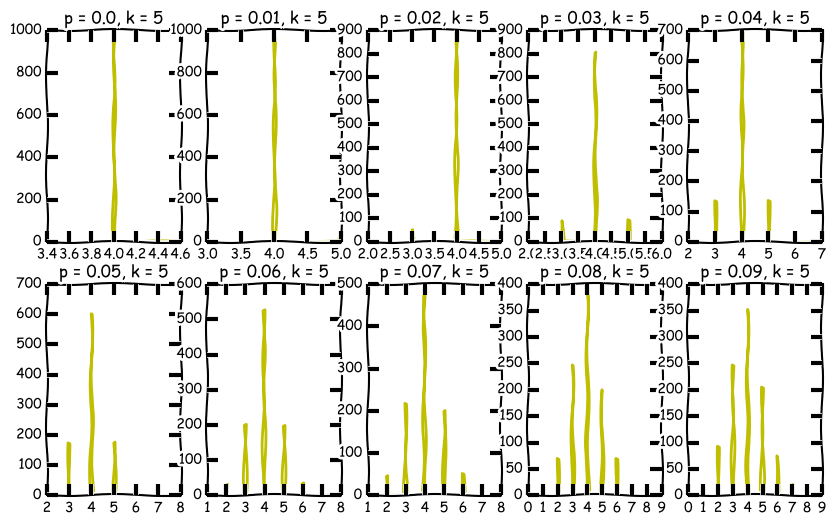

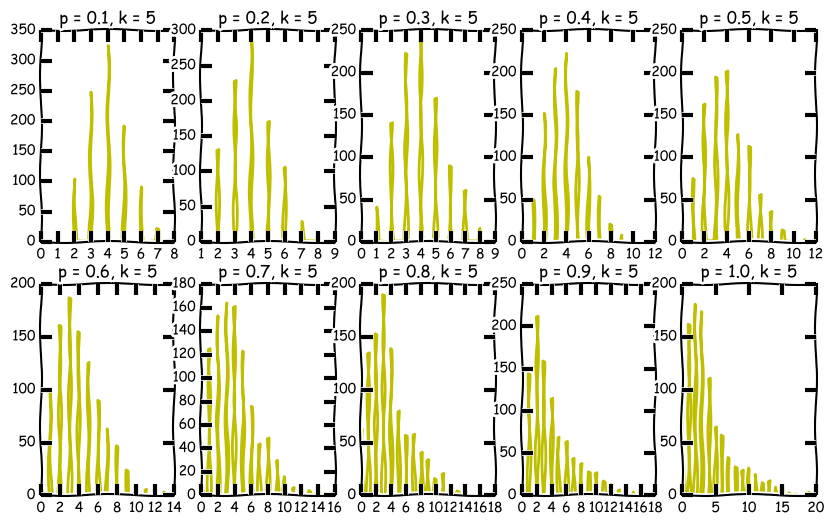

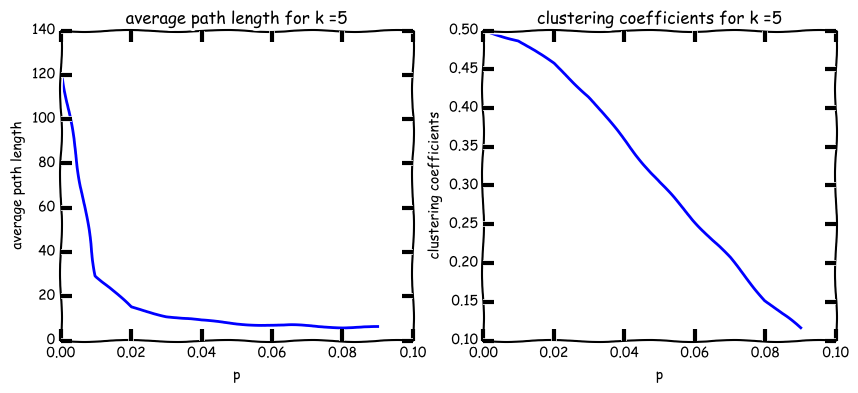

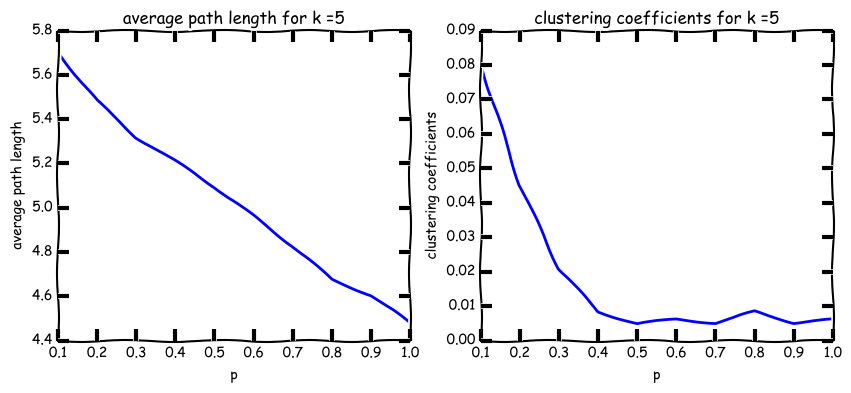

In [161]:
task2(5,1000,'y') # k = 5, n = 1000

<L(0)> = 50.4504504505
C(0) = 0.666666666667
<L(1)> = 3.14947020868
C(1) = 0.0166233492091


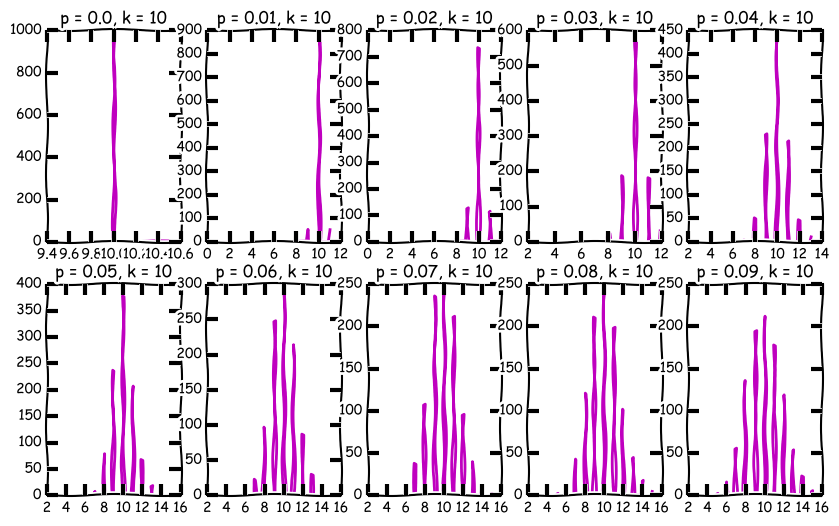

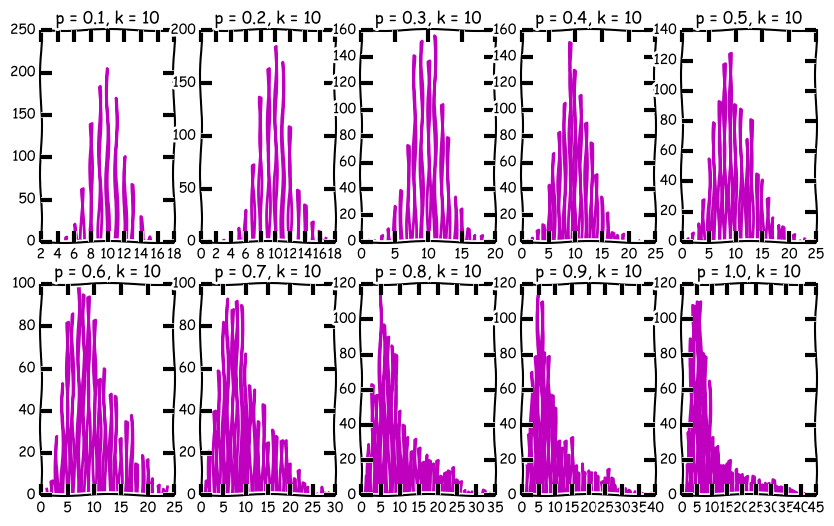

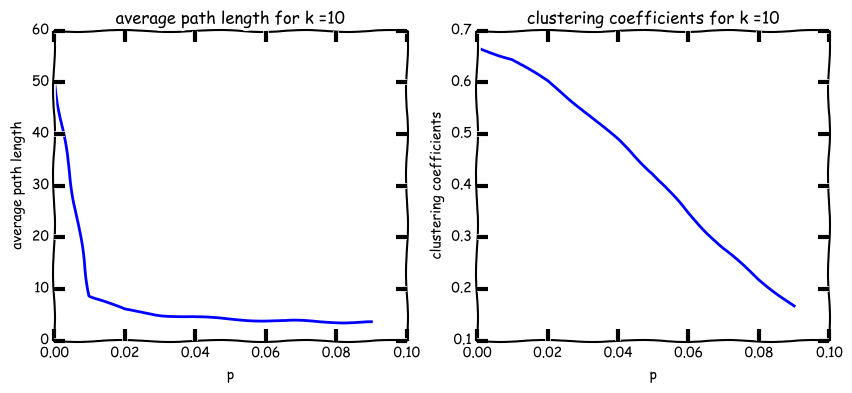

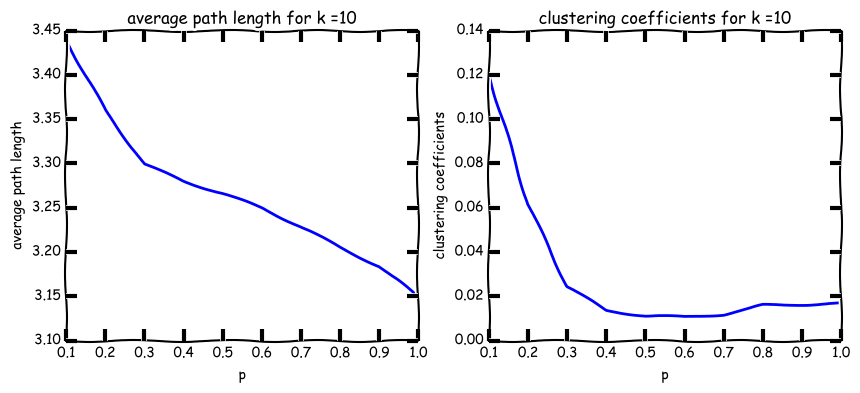

In [162]:
task2(10,1000,'m') # k = 10, n = 1000

We consider a case when $n = 1000$ and $k = 10$ (we have also showed when $k = 5$).

We know that:

1.$\ $average path length $⟨L(p)⟩$ 
* $p \rightarrow 0$, ring lattice, $⟨L(0)⟩ = \frac{2n}{k}$, in our case $⟨L(0)⟩ \rightarrow \frac{2000}{10} = 200$
* $p \rightarrow 1$, random graph, $⟨L(1)⟩ = \frac{log(n)}{log(k)}$, in our case $⟨L(1)⟩ \rightarrow \frac{log(1000)}{log(10)} = 3$
* We can say that the bigger $p$, the smaller $⟨L(p)⟩$.

2.$\ $Clustering coefficient $C(p)$
* $p \rightarrow 0$, ring lattice, $C(0) \rightarrow \frac{3}{4} = const$
* $p \rightarrow 1$, random graph, $C(1) = \frac{k}{n}$, in our case $C(1) \rightarrow \frac{10}{1000} = 0.01$
* We can also say that the bigger $p$, the smaller $C(p)$.

3.$\ $For some $0< p< 1$ node degree distribution converges to Poisson distribution.

We can note that theoretical calculations correspond to our practical results represented at the pictures above taking in account that formulas are true for large $n$. 



#### Task 3

Compute centrality metrics for the network and highlight interaction between vertices with the highest degree. Plot the interesting cases and interpret them.


In [112]:
G1_lab = nx.read_gml(path = 'polblogs.gml',relabel=True) 
G_lab = nx.Graph(G1_lab, label = 'label') #
G = nx.convert_node_labels_to_integers(G_lab, first_label=0, ordering='default', label_attribute='label_old')

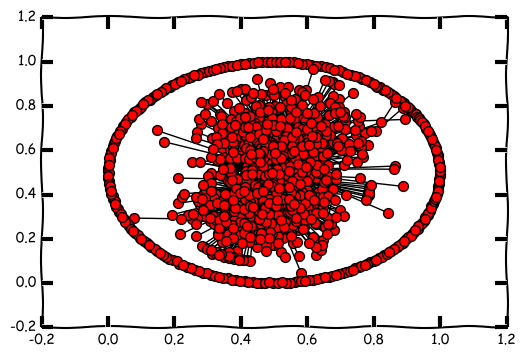

In [115]:
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels = False,node_size = 50)

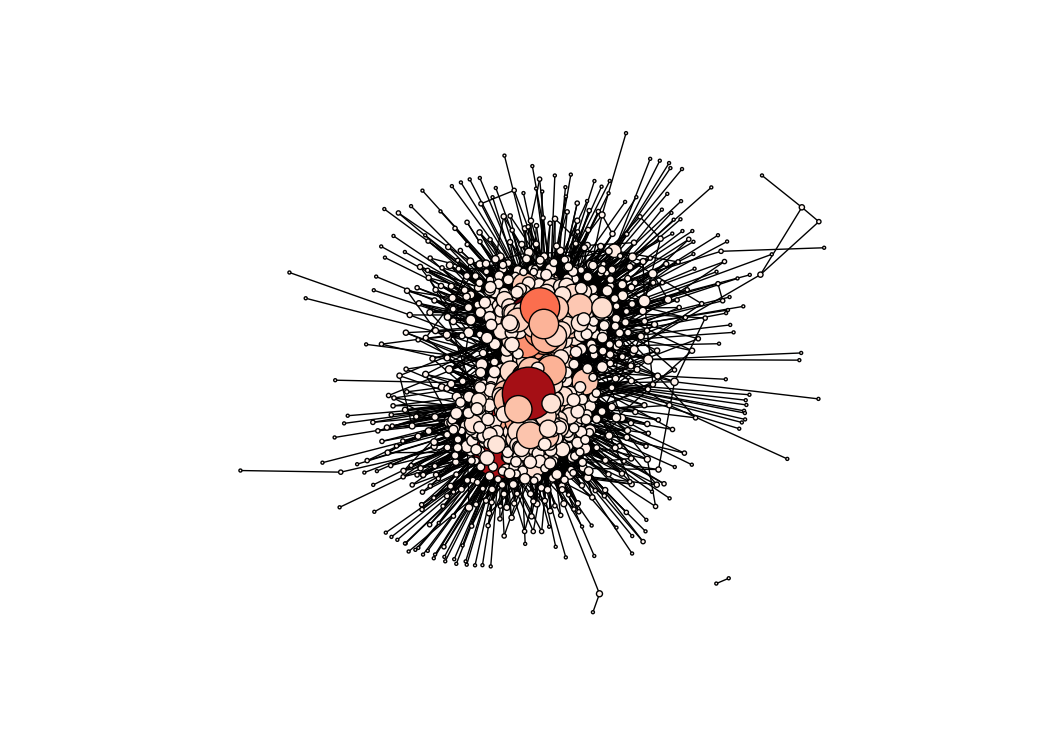

In [116]:
# Degree centrality
dc = nx.degree_centrality(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=dc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )

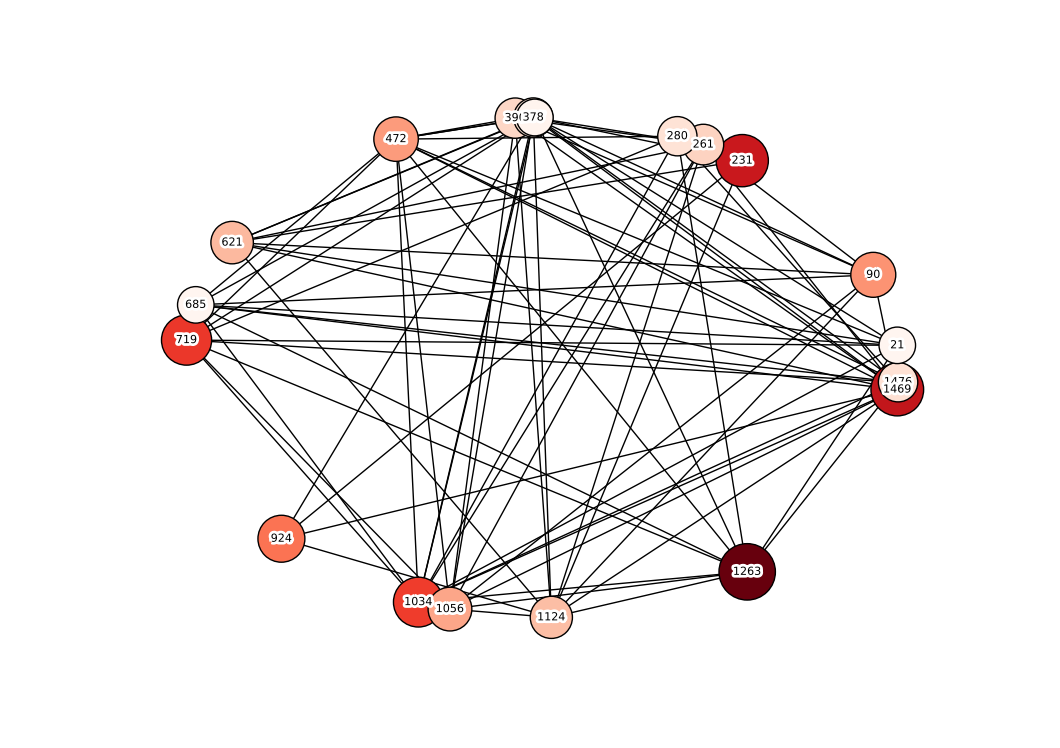

In [132]:
# draw the subgraph with the highest values of degree centralities
dc_ind = np.array(sorted(dc, key = dc.get,reverse= True)[:19])
dc_sort = np.array(dc.values())
dc_large = list(dc_sort[dc_ind])
dc_ind = list(dc_ind)

G_dc = G.subgraph(dc_ind)
plt.figure(1, figsize=(10,7))
pos = nx.circular_layout(G)
nx.draw(G_dc,
          pos,
          nodelist=dc_ind,
          node_size = [d*7000 for d in dc_large],
          node_color=dc_large,
          font_size=8,
          cmap=plt.cm.Reds,
          with_labels = True
          )

In [133]:
print G_lab.nodes()[dc_ind[0]] # a node with the greatest degree centrality

dailykos.com


If we go to the website $\textit{dailykos.com}$, the greatest value of degree centrality will be clear because this website is the top site for American political blogging.

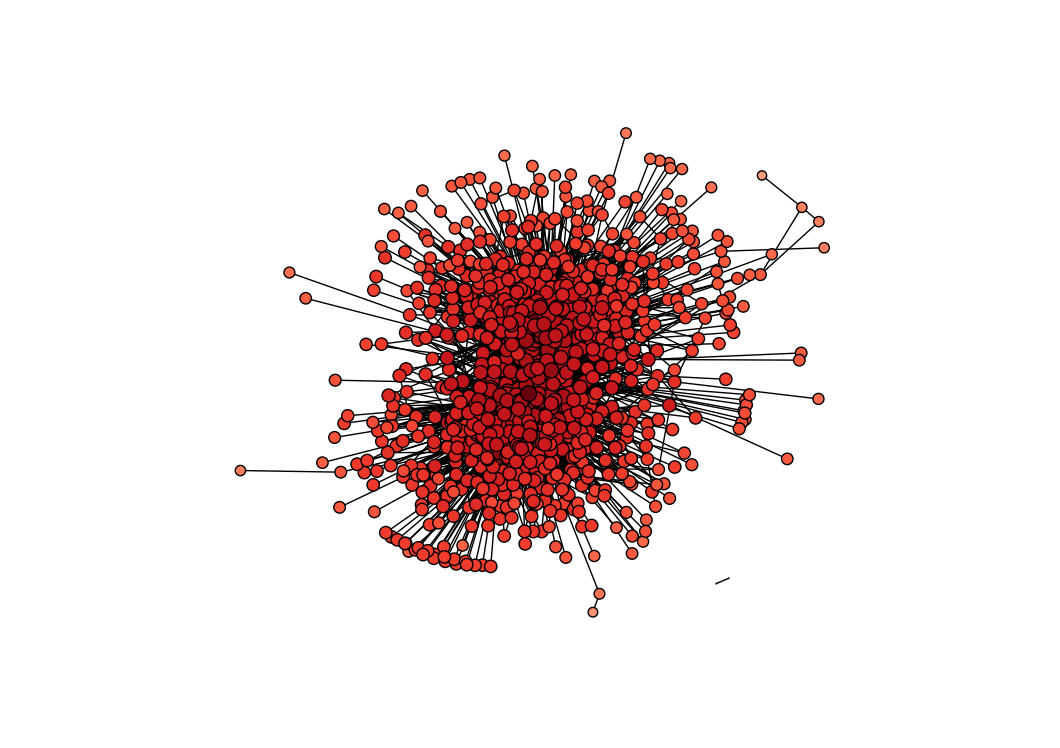

In [121]:
# Closeness centrality
cl  = nx.closeness_centrality(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=cl.keys(),
          node_size = [d*300 for d in cl.values()],
          node_color=cl.values(),
          font_size=8,
          cmap=plt.cm.Reds
          )

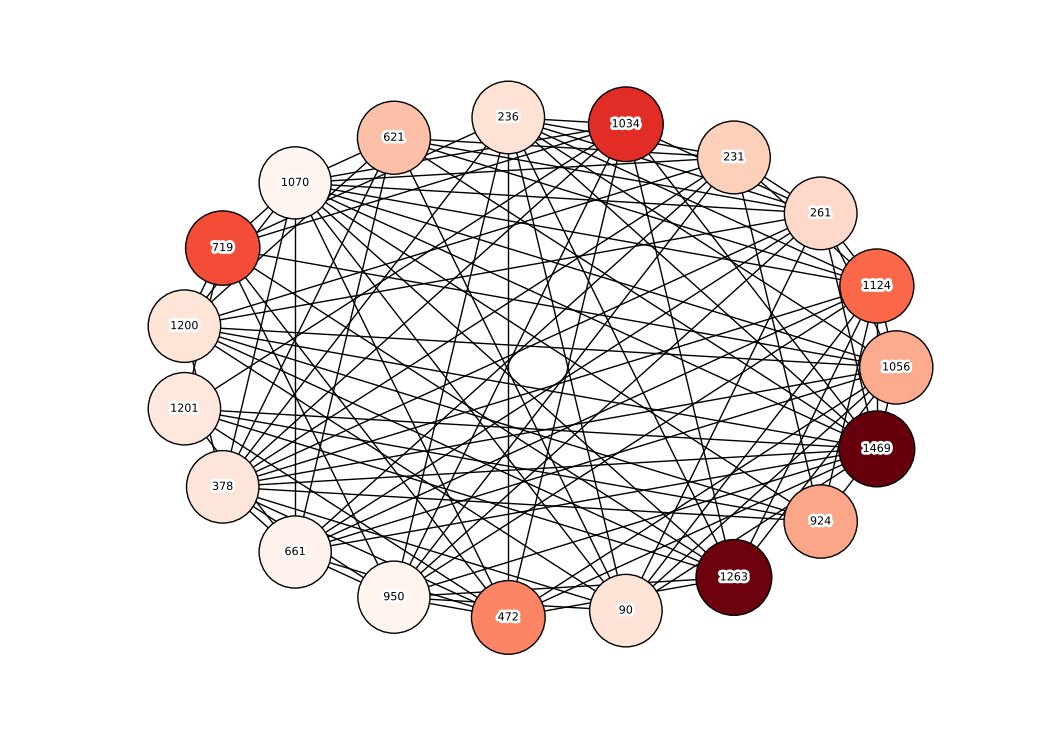

In [130]:
# draw the subgraph with the highest values of closeness centralities
cl_ind = np.array(sorted(cl, key = cl.get,reverse= True)[:19])
cl_sort = np.array(cl.values())
cl_large = list(cl_sort[cl_ind])
cl_ind = list(cl_ind)

G_cl = G.subgraph(cl_ind)
plt.figure(1, figsize=(10,7))
pos = nx.circular_layout(G_cl)
nx.draw(G_cl,
          pos,
          nodelist=cl_ind,
          node_size = [d*7000 for d in cl_large],
          node_color=cl_large,
          font_size=8,
          cmap=plt.cm.Reds,
          with_labels = True
          )

In [134]:
print G_lab.nodes()[cl_ind[0]] # a node with the greatest closeness centrality

instapundit.com


This result is obvious, because the most viewed libertarian blog $\textit{instapundit.com}$ contains many links to other sites.

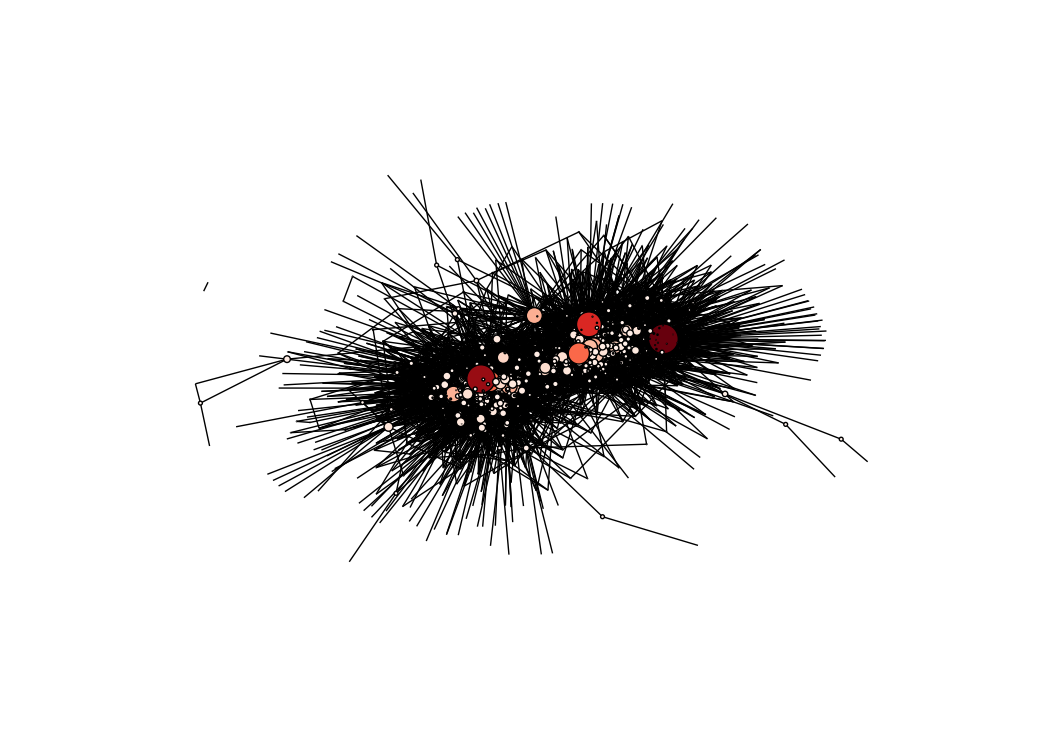

In [139]:
# Betweennes centrality
bc = nx.betweenness_centrality(G)
plt.figure(1, figsize=(10,7))
pos = nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=bc.keys(),
          node_size = [d*7000 for d in bc.values()],
          node_color=bc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )

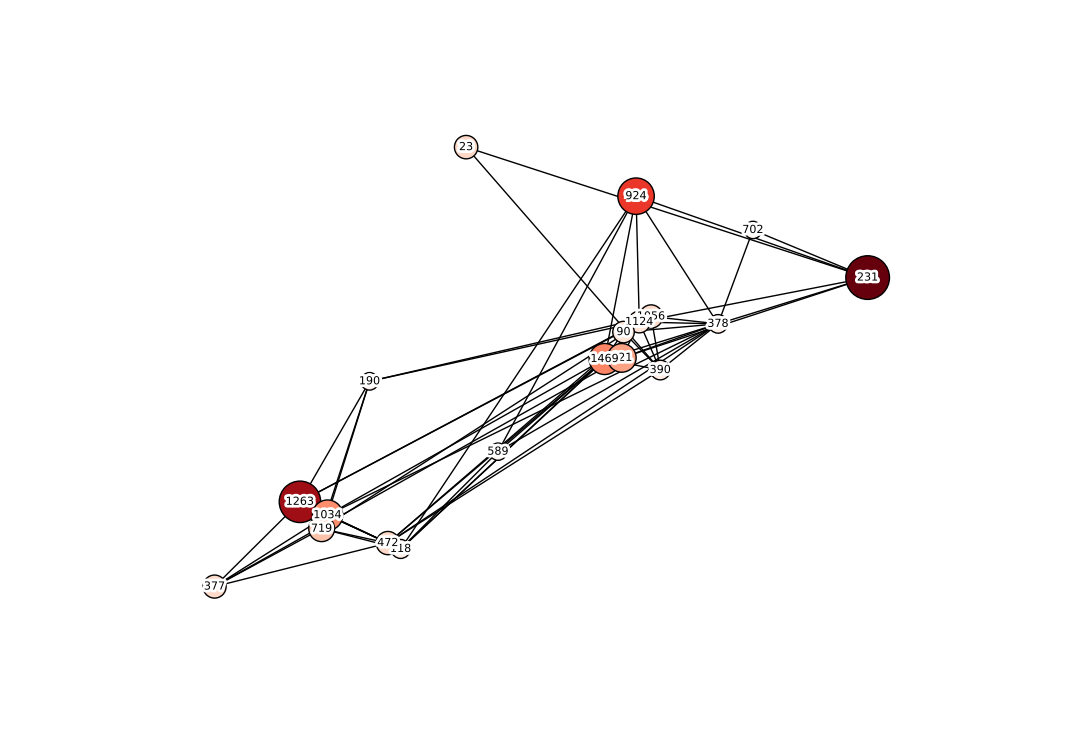

In [140]:
# draw the subgraph with the highest values of betweeness centralities
bc_ind = np.array(sorted(bc, key = bc.get,reverse= True)[:19])
bc_sort = np.array(bc.values())
bc_large = list(bc_sort[bc_ind])
bc_ind = list(bc_ind)

G_bc = G.subgraph(bc_ind)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw(G_bc,
          pos,
          nodelist=bc_ind,
          node_size = [d*15000 for d in bc_large],
          node_color=bc_large,
          font_size=8,
          cmap=plt.cm.Reds,
        with_labels = True
          )

In [143]:
print G_lab.nodes()[bc_ind[0]] # a node with the greatest betweeness centrality

blogsforbush.com


This asian website $\textit{blogsforbush.com}$ now doesn't work, possibly, it had aggregated  polytical information from the other liberal and  conservative sites.

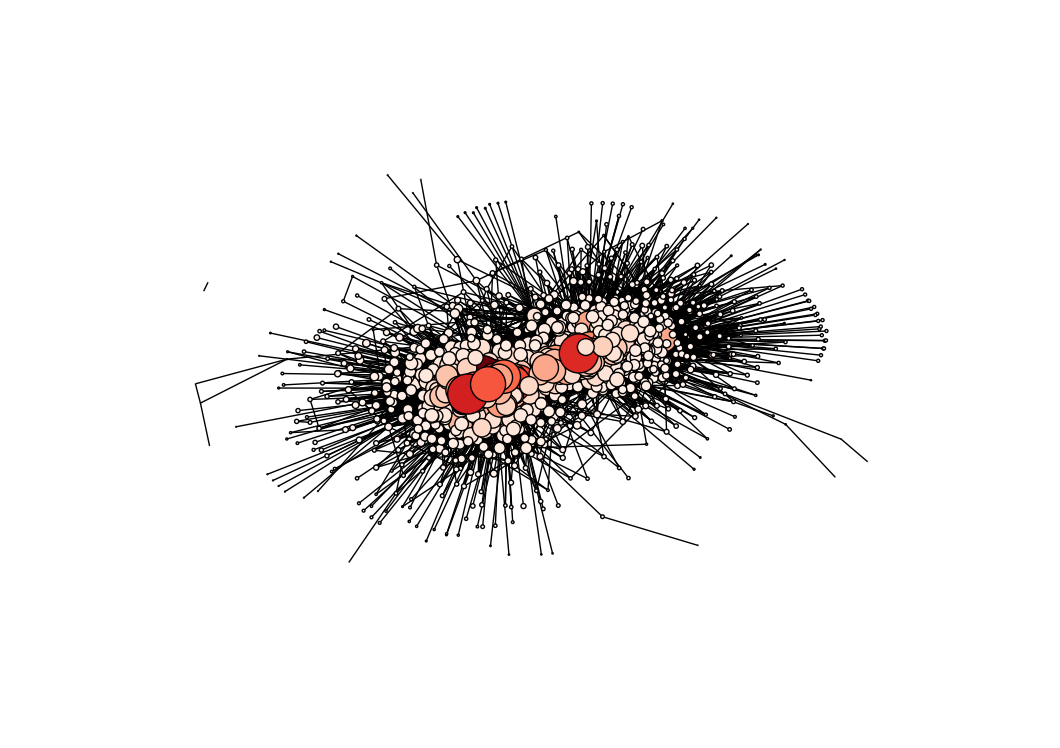

In [144]:
# Eigenvector centrality
ec = nx.eigenvector_centrality(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=ec.keys(),
          node_size = [d*7000 for d in ec.values()],
          node_color=ec.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )

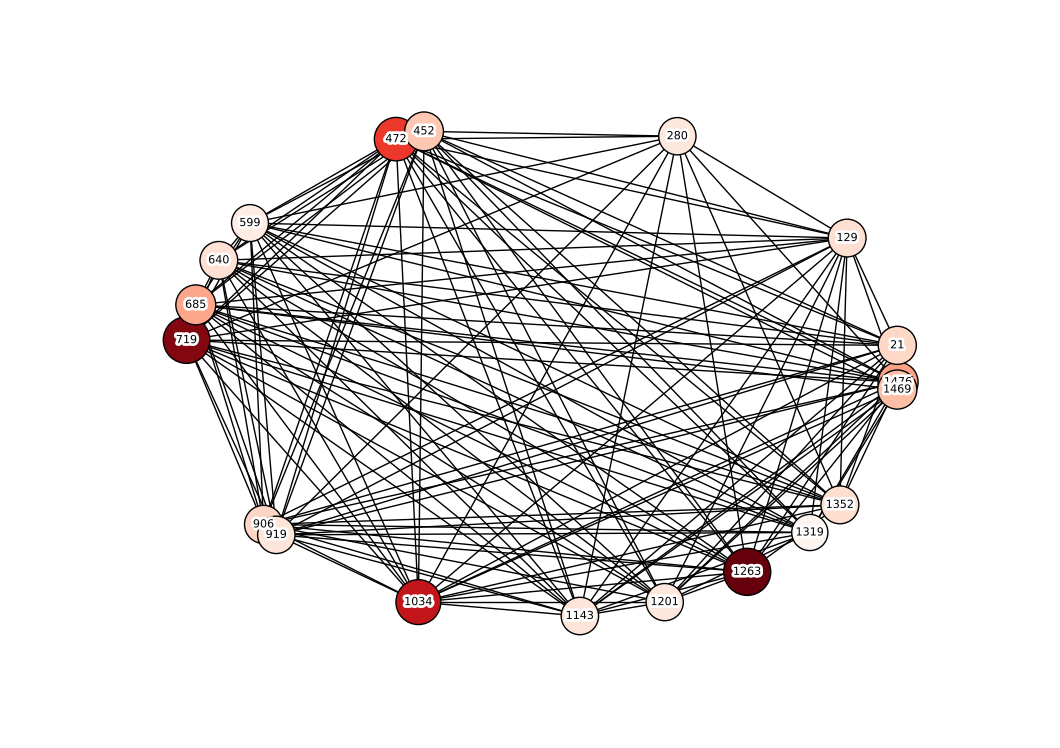

In [150]:
# draw the subgraph with the highest values of Eigenvector centralities
ec_ind = np.array(sorted(ec, key = ec.get,reverse= True)[:19])
ec_sort = np.array(ec.values())
ec_large = list(ec_sort[ec_ind])
ec_ind = list(ec_ind)

G_ec = G.subgraph(ec_ind)
plt.figure(1, figsize=(10,7))
pos = nx.circular_layout(G)
nx.draw(G_ec,
          pos,
          nodelist=ec_ind,
          node_size = [d*7000 for d in ec_large],
          node_color=ec_large,
          font_size=8,
          cmap=plt.cm.Reds,
        with_labels = True
          )

In [151]:
print G_lab.nodes()[ec_ind[0]] # a node with the greatest Eigenvector  centrality

dailykos.com


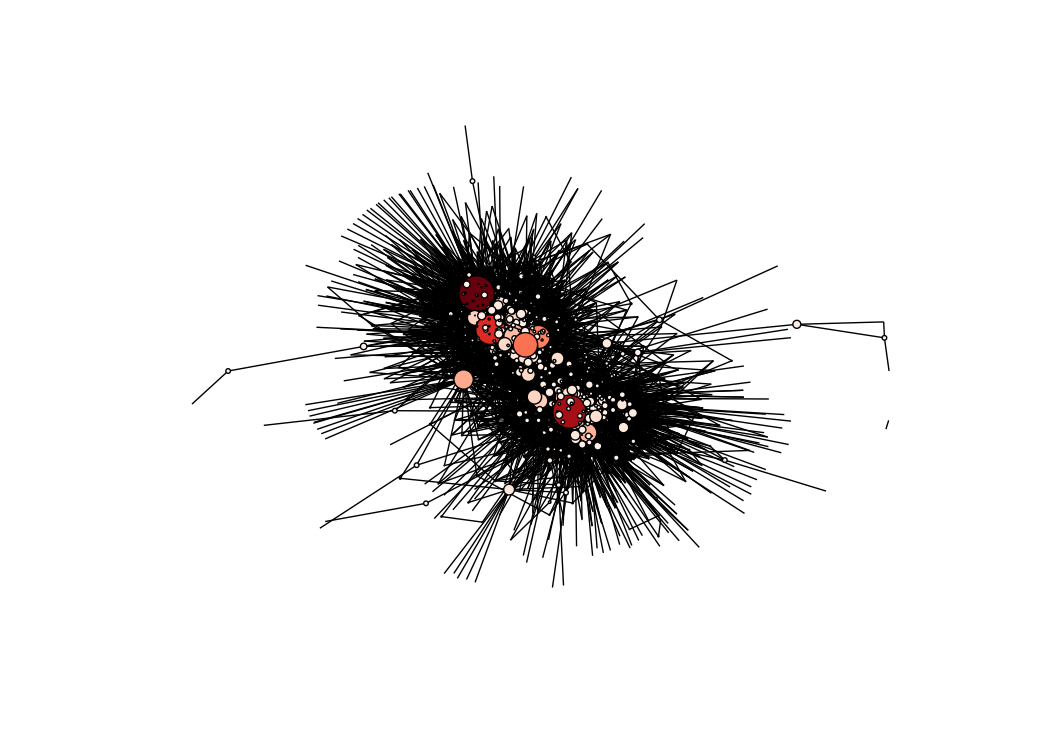

In [155]:
# Load Centrality
lc = nx.load_centrality(G)
plt.figure(1, figsize=(10,7))
pos= nx.spring_layout(G)
nx.draw(G,
          pos,
          nodelist=lc.keys(),
          node_size = [d*10000 for d in lc.values()],
          node_color=lc.values(),
          font_size=8,
          cmap=plt.cm.Reds,
          )

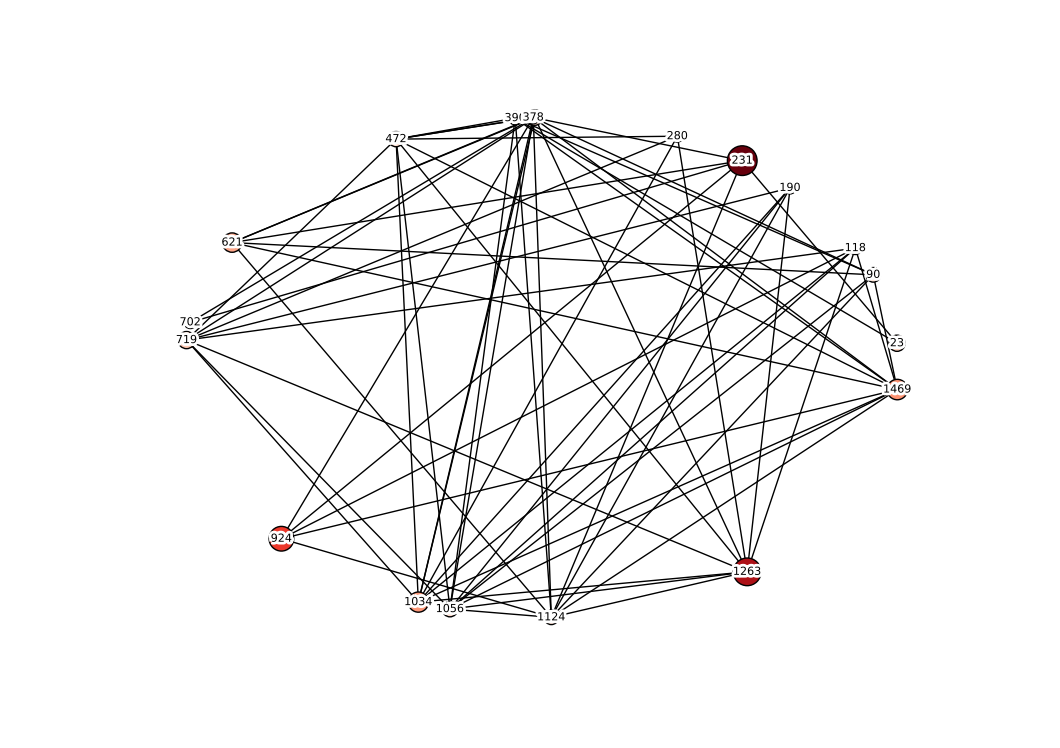

In [153]:
# draw the subgraph with the highest values of load centralities
lc_ind = np.array(sorted(lc, key = lc.get,reverse= True)[:19])
lc_sort = np.array(lc.values())
lc_large = list(lc_sort[lc_ind])
lc_ind = list(lc_ind)

G_lc = G.subgraph(lc_ind)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw(G_lc,
          pos,
          nodelist=lc_ind,
          node_size = [d*7000 for d in lc_large],
          node_color=lc_large,
          font_size=8,
          cmap=plt.cm.Reds,
        with_labels = True
          )

In [159]:
print G_lab.nodes()[lc_ind[0]] # a node with the greatest load centrality

blogsforbush.com


We will see form the fifth task that for our graph values of betweeness and load centralities are almost the same, because the definitions of these centrilities are similar. That is why the site $\textit{blogsforbush.com}$  has the greatest value of load (as betweeness) centrality.

Also it is interesting to note that the site $\textit{dailykos.com}$ ( id $= 1263$) has greatest value of all considering centralities that indicates popularity and great influence of this site.

#### Task 4
Try to model the network from (3) with Small World Model and Erdos-Renyi Model.

In [49]:
n = G.number_of_nodes()
m = G.number_of_edges()
p = 0.7
k_avg = int(round(np.mean((nx.degree(G).values()))))
G_erd = nx.gnm_random_graph(n,m) # Erdos model
G_sw = nx.watts_strogatz_graph(n,k_avg,p) # Small world model  

#### Task 5
Plot the dependencies between different centrality metrics for the network and the simultaed graphs. Are there any correlations between centrality metrics? Explain the differences.

In [50]:
cts = [dc,cl,bc,ec,lc]
lbs = ['dc','cl','bc','ec','lc']

In [51]:
dc_erd = nx.degree_centrality(G_erd)
cl_erd = nx.closeness_centrality(G_erd)
bc_erd = nx.betweenness_centrality(G_erd)
ec_erd = nx.eigenvector_centrality(G_erd)
lc_erd = nx.load_centrality(G_erd)
cts_erd = [dc_erd,cl_erd,bc_erd,ec_erd,lc_erd]

In [52]:
dc_sw = nx.degree_centrality(G_sw)
cl_sw = nx.closeness_centrality(G_sw)
bc_sw = nx.betweenness_centrality(G_sw)
ec_sw = nx.eigenvector_centrality(G_sw)
lc_sw = nx.load_centrality(G_sw)
cts_sw = [dc_sw,cl_sw,bc_sw,ec_sw,lc_sw]

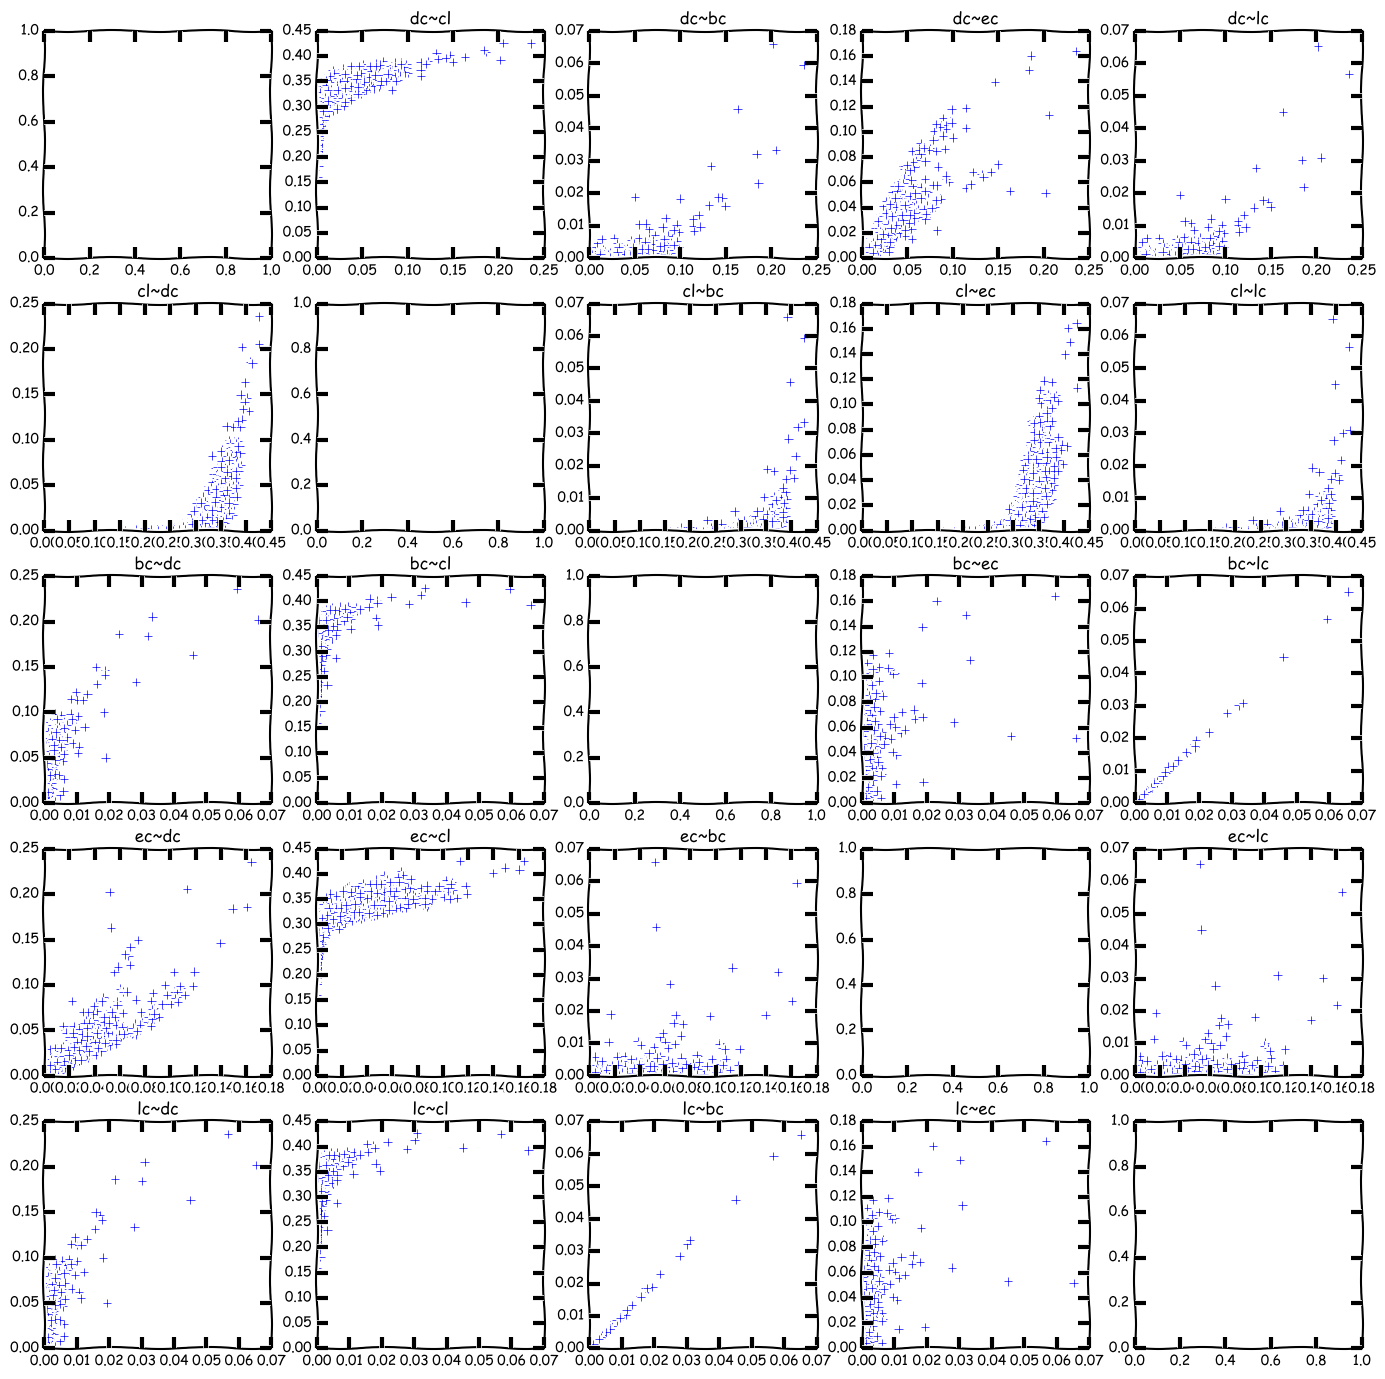

In [53]:
# dependencies between centrality metrics for the network
ind = 0
plt.figure( figsize=(17,17))
for i in range(len(cts)):
    for j in range(len(cts)):
        ind += 1
        plt.subplot(len(cts),len(cts),ind)
        if i != j:
            plt.plot(cts[i].values(),cts[j].values(),'+')
            plt.title('%s~%s'%(lbs[i],lbs[j]))
   

We see a strong linear dependence between betweeness centrality and load centrelity, because these centralities have the similar definition regarding with the number of shotest paths.

Also, the bigger value of degree centralites, the bigger value of eigenvector centrality.


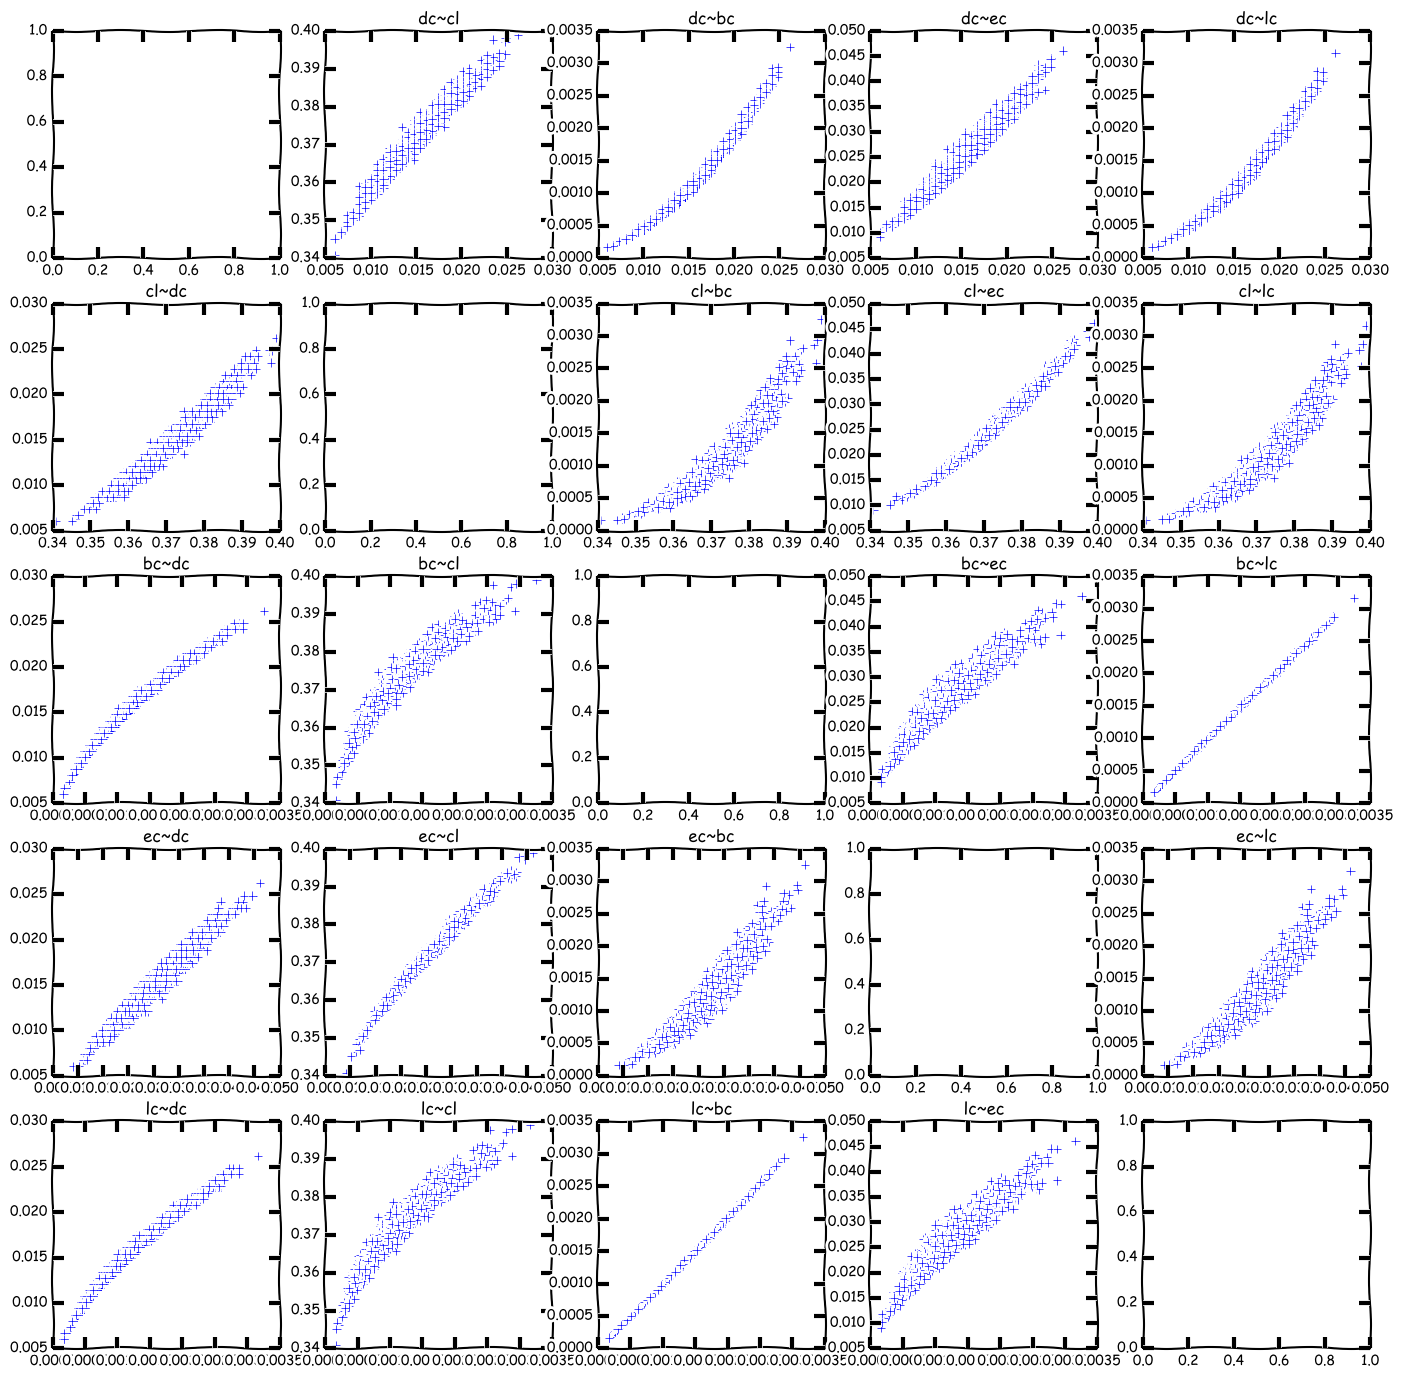

In [54]:
# dependencies between centrality metrics for the Erdos model
ind = 0
plt.figure( figsize=(17,17))
for i in range(len(cts_erd)):
    for j in range(len(cts_erd)):
        ind += 1
        plt.subplot(len(cts_erd),len(cts_erd),ind)
        if i != j:
            plt.plot(cts_erd[i].values(),cts_erd[j].values(),'+')
            plt.title('%s~%s'%(lbs[i],lbs[j]))

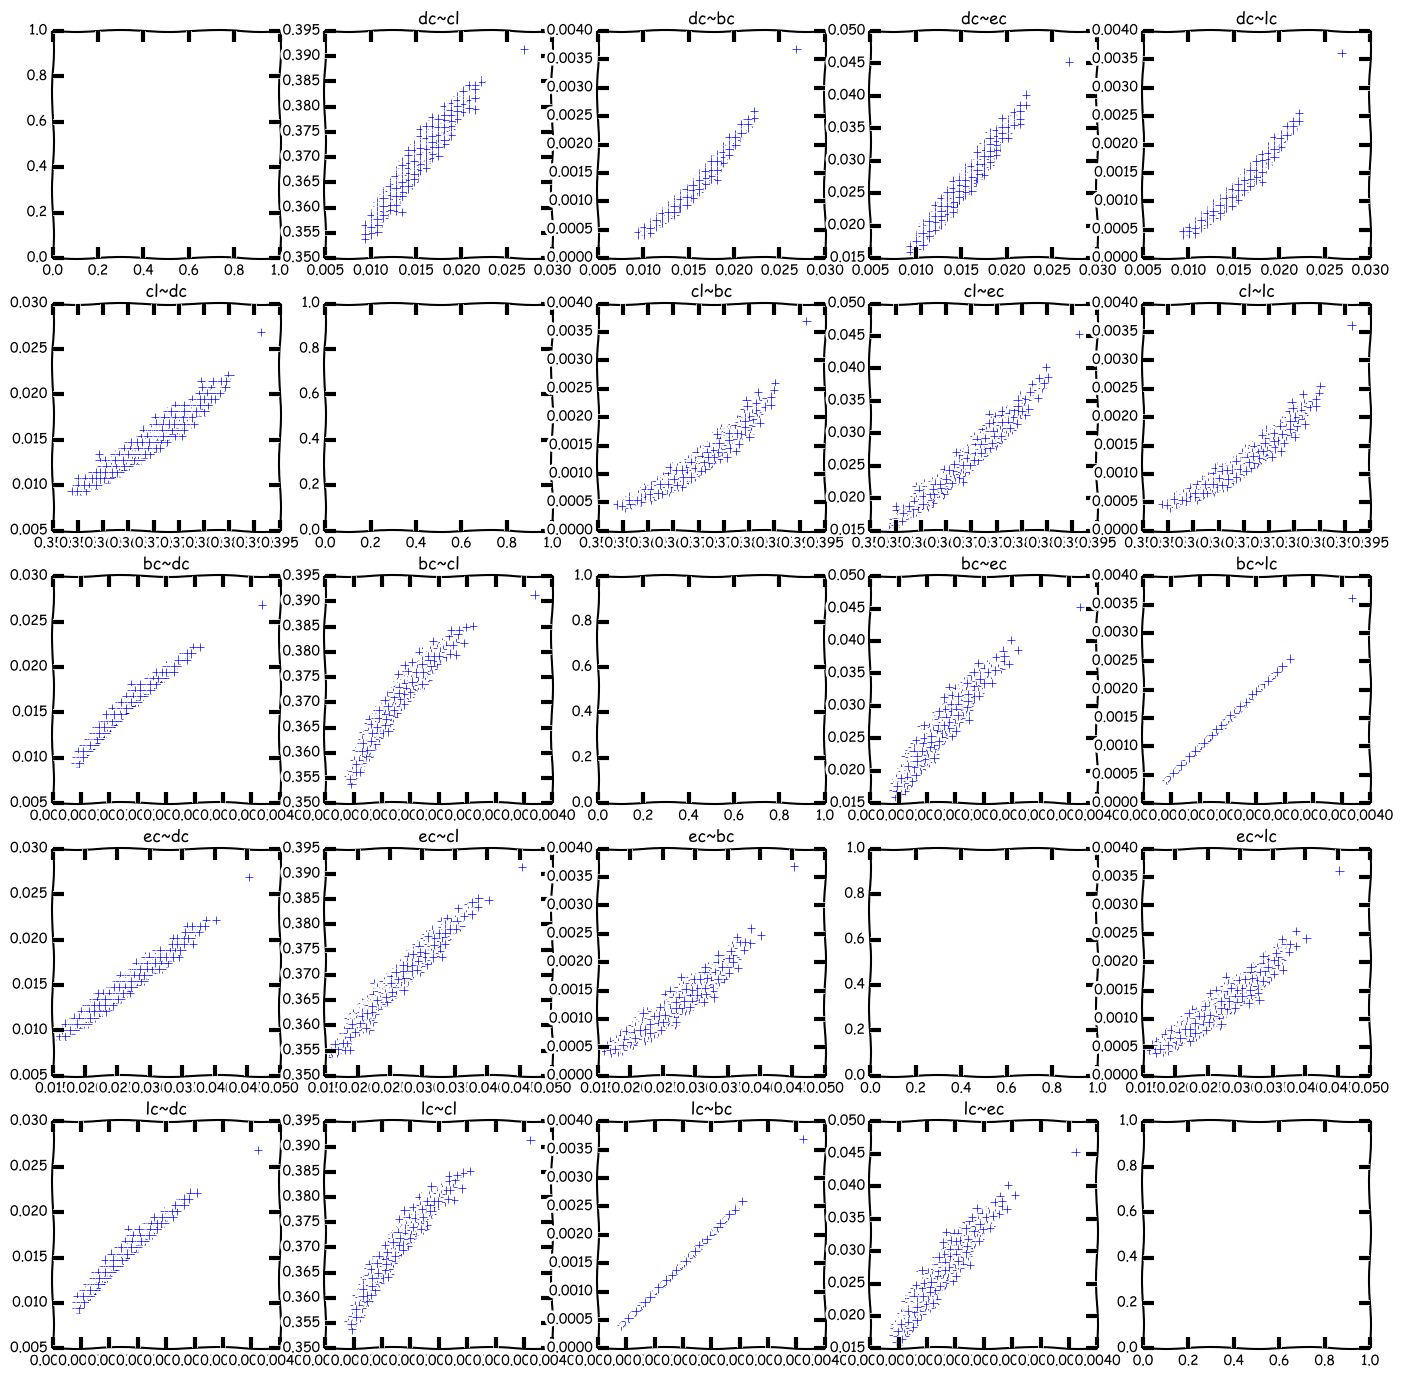

In [55]:
# dependencies between centrality metrics for the Small World model
ind = 0
plt.figure( figsize=(17,17))
for i in range(len(cts_sw)):
    for j in range(len(cts_sw)):
        ind += 1
        plt.subplot(len(cts_sw),len(cts_sw),ind)
        if i != j:
            plt.plot(cts_sw[i].values(),cts_sw[j].values(),'+')
            plt.title('%s~%s'%(lbs[i],lbs[j]))

We can say that dependences between different centralities for two models are more explicitly seen than for real network. In all cases, you can assume a polynomial or even linear dependence between centralities with unidirectional increase.
It is explained by quite small average path length for these models and quite dense graphs.